In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io
from sklearn.decomposition import PCA

In [144]:
def Pca(X, k):
    X_0 = (X - np.mean(X,axis = 0)) / np.std(X,axis = 0)
    cov_0 = np.cov(X_0, rowvar=False)
    w, v = np.linalg.eigh(cov_0)
    w = np.flip(np.absolute(w),axis = 0)
    v = np.flip(v,axis = 1)
    X_pc = np.dot(X_0,v) * (1/np.sqrt(w))
    return X_pc[:,:k]

def Pca2(X, threshold = 0.9):
    X_0 = (X - np.mean(X,axis = 0)) / np.std(X,axis = 0)
    cov_0 = np.cov(X_0, rowvar=False)
    w, v = np.linalg.eigh(cov_0)
    w = np.flip(np.absolute(w),axis = 0)
    v = np.flip(v,axis = 1)
    X_pc = np.dot(X_0,v) * (1/np.sqrt(w))
    i = 1
    s = np.sum(w)
    while(np.sum(w[:i])/s < threshold):
        i+=1
    return X_pc[:,:i], i

In [145]:
faces = scipy.io.loadmat('ReducedImagesForTraining.mat')['images'].T
faces.shape

(250, 4920)

In [146]:
def show_face(data,i):
    pic = data[i,:]
    plt.figure(figsize=(3,4))
    plt.imshow(pic.reshape(60,82).T, cmap = 'gray')

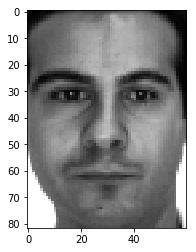

In [147]:
show_face(faces,0)

117 out of 4920


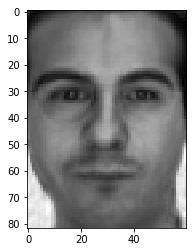

In [148]:
#PCA(n_components=None,...)
#select the number of components such that the amount of variance 
#that needs to be explained is greater than the percentage specified by n_components
pca = PCA(0.97)
pca.fit(faces)
X_pc = pca.transform(faces)
X_res = pca.inverse_transform(X_pc)

print('{} out of 4920'.format(pca.n_components_))
show_face(X_res,0)

49 out of 4920


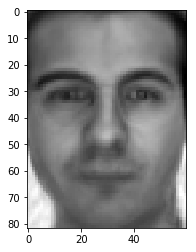

In [149]:
pca = PCA(0.9)
pca.fit(faces)
X_pc = pca.transform(faces)
X_res = pca.inverse_transform(X_pc)

print('{} out of 4920'.format(pca.n_components_))
show_face(X_res,0)

4 out of 4920


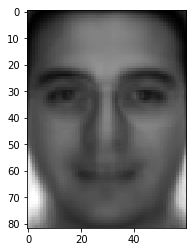

In [150]:
pca = PCA(0.5)
pca.fit(faces)
X_pc = pca.transform(faces)
X_res = pca.inverse_transform(X_pc)

print('{} out of 4920'.format(pca.n_components_))
show_face(X_res,0)

2 out of 4920


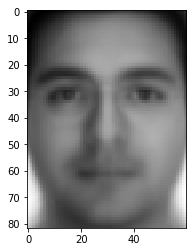

In [158]:
pca = PCA(0.4)
pca.fit(faces)
X_pc = pca.transform(faces)
X_res = pca.inverse_transform(X_pc)

print('{} out of 4920'.format(pca.n_components_))
show_face(X_res,0)

249 out of 4920


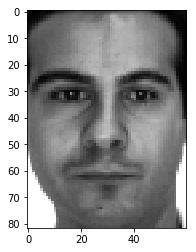

In [159]:
pca = PCA(0.99999)
pca.fit(faces)
X_pc = pca.transform(faces)
X_res = pca.inverse_transform(X_pc)

print('{} out of 4920'.format(pca.n_components_))
show_face(X_res,0)

176 out of 4920


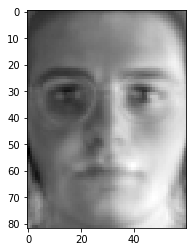

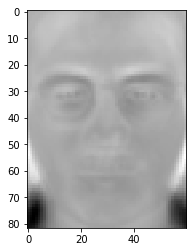

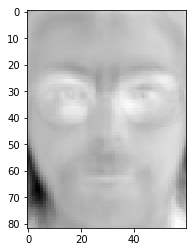

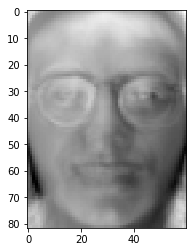

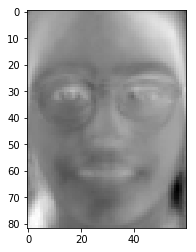

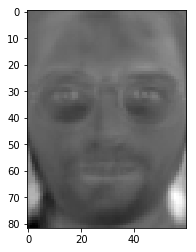

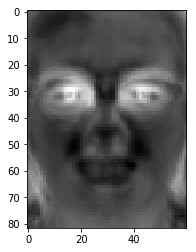

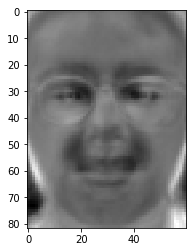

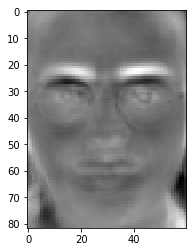

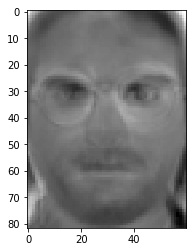

In [163]:
pca = PCA(0.99)
pca.fit(faces)
print('{} out of 4920'.format(pca.n_components_))
components = pca.components_
#components_: Principal axes in feature space, representing the directions of maximum variance in the data.
for i in range(10):
    show_face(components,i)

### Uwaga, powolne:

In [93]:
X = faces
k = 100
X_mean = np.mean(X,axis = 0)
X_std = np.std(X,axis = 0)

X_0 = (X - X_mean) / X_std
cov_0 = np.cov(X_0, rowvar=False)
w, v = np.linalg.eigh(cov_0)
w = np.flip(np.absolute(w),axis = 0)
v = np.flip(v,axis = 1)
X_pc = np.dot(X_0,v) * (1/np.sqrt(w))

In [95]:
X_pca = X_pc[:,:k]
w_pc = w[:k]
v_pc = v[:,:k]

X_st = (faces - X_mean)/ X_std
X_ohne_lambdas = X_pca * np.sqrt(w_pc)
X_res =  np.dot(X_ohne_lambdas,v_pc.T)
err = np.sum((X_res - X_st)**2)/4920

print("restoring error:",err)
print("sum of the least eigenvalues:", np.sum(w[k:]))

restoring error: 1.23157970706
sum of the least eigenvalues: 24.3348279467


Input data
Restored data


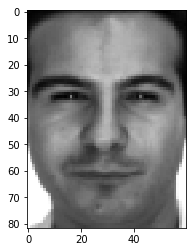

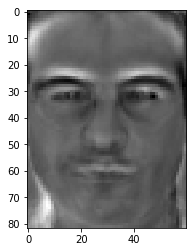

In [105]:
def compare(i):
    print("Input data")
    show_face(X,i)
    print("Restored data")
    show_face(X_res,i)

compare(2)

In [125]:
X = faces
threshold = 0.9
X_mean = np.mean(X,axis = 0)
X_std = np.mean(X,axis = 0)
X_0 = (X - X_mean) / X_mean
cov_0 = np.cov(X_0, rowvar=False)
w, v = np.linalg.eigh(cov_0)
w = np.flip(np.absolute(w),axis = 0)
v = np.flip(v,axis = 1)
X_pc = np.dot(X_0,v) * (1/np.sqrt(w))    
i = 1
s = np.sum(w)
while(np.sum(w[:i])/s < threshold):
    i+=1

In [126]:
X_pca = X_pc[:,:i]
w_pc = w[:i]
v_pc = v[:,:i]

X_st = (faces - X_mean)/ X_std
X_ohne_lambdas = X_pca * np.sqrt(w_pc)
X_res =  np.dot(X_ohne_lambdas,v_pc.T)
err = np.sum((X_res - X_st)**2)/4920

print("restoring error:",err)
print("sum of the least eigenvalues:", np.sum(w[i:]))

restoring error: 3.044141703
sum of the least eigenvalues: 60.1493059388


Input data
Restored data


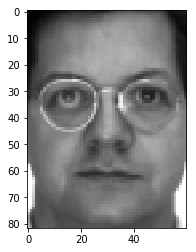

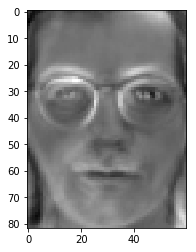

In [141]:
def compare(i):
    print("Input data")
    show_face(X,i)
    print("Restored data")
    show_face(X_res,i)

compare(10)